## Домашнее задание 1

**Разбаловка**:

1) задачи 1 - 4: по 1 баллу
2) задачи 5 - 6: по 2 балла
3) задача 7: 4 балла

Максимальный балл: 12 баллов. Оценка за задание ставится как `min(10, ваш балл)`.

### Пакет NumPy
---


In [1]:
import copy

import numpy as np
import random
import scipy.stats as sps

# Задача 1
В первой задаче вам предлагается перемножить две матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100, 1000))
b = np.random.sample((1000, 100))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print('A has {} dimensions.'.format(np.ndim(a)))
print('B has {} dimensions.'.format(np.ndim(b)))
# The shape() function shows the tuple of array dimensions.
print('The shape of A is: {}'.format(np.shape(a)))
print('The shape of B is: {}'.format(np.shape(b)))
# ========

A has 2 dimensions.
B has 2 dimensions.
The shape of A is: (100, 1000)
The shape of B is: (1000, 100)


In [3]:
def mult(a, b):
    #Check if dimensions are the same
    if np.ndim(a) != 2 | np.ndim(b) != 2:
        raise Exception('Wrong dimensions!')

    #Check if they can be multiplied. This means that the number of columns in a should be equal to the number of rows in b.
    if np.shape(a)[1] != np.shape(b)[0]:
        raise Exception('Cannot multiply matrices. Wrong shapes!')

    #result is matrix with
    result = np.ndarray(shape=(np.shape(a)[0], np.shape(b)[1]))

    # print('np.shape(a)[0]: {}'.format(np.shape(a)[0]))
    # print('np.shape(b)[1]: {}'.format(np.shape(b)[1]))
    # print('np.shape(b)[0]: {}'.format(np.shape(b)[0]))
    #
    # print(a[10, 10])
    # print(a[10][10])

    #iterate through rows of a
    for i in range(np.shape(a)[0]):
        #iterate through columns of b
        for j in range(np.shape(b)[1]):
            #iterate through rows of b
            for k in range(np.shape(b)[0]):
                result[i,j] += a[i][k] * b[k][j]

    return result

    # здесь напишите перемножение матриц без 
    # использования NumPy (с помощью тройного цикла) и верните результат

In [4]:
def np_mult(a, b):
    return np.matmul(a, b)
    # здесь напишите перемножение матриц с
    # использованием матричного умножения из пакета NumPy и верните результат

In [5]:
# Превратим матрицы в листы, чтобы протестировать функцию без np
a_list = [[x for x in row] for row in a]
b_list = [[x for x in row] for row in b]

In [6]:
%%time
# засечем время работы функции без NumPy
mult(a_list, b_list)

CPU times: user 46.2 s, sys: 18.5 ms, total: 46.3 s
Wall time: 46.3 s


array([[250.65664222, 240.89151357, 256.48728736, ..., 255.89266677,
        251.80655527, 255.73020907],
       [244.57491827, 228.91773908, 249.6281485 , ..., 245.07862051,
        242.07649205, 249.75939456],
       [250.76304808, 230.87015108, 254.20525295, ..., 250.29555176,
        247.16927917, 251.12066963],
       ...,
       [239.0870188 , 225.81967644, 244.68757944, ..., 241.27049218,
        238.09770689, 243.56838142],
       [243.41053545, 229.28186348, 250.64726577, ..., 247.48273548,
        238.14878398, 246.0424146 ],
       [249.86260184, 237.8524308 , 251.8885085 , ..., 244.95018146,
        249.63248112, 250.22019836]])

In [7]:
%%time
# засечем время работы функции с NumPy
np_mult(a, b)

CPU times: user 4.96 ms, sys: 3.92 ms, total: 8.88 ms
Wall time: 6.23 ms


array([[249.67389752, 240.77129907, 256.20515701, ..., 255.45242947,
        251.1841538 , 255.32923139],
       [244.05637983, 228.63755295, 249.17554297, ..., 244.56758107,
        241.85603366, 249.56652351],
       [250.12743731, 230.10885804, 254.08411766, ..., 249.77507329,
        246.38448923, 250.80158172],
       ...,
       [238.48284838, 225.21014952, 244.36488766, ..., 241.18458637,
        237.60155017, 242.77330124],
       [242.69479187, 228.80337471, 249.78189619, ..., 246.56655321,
        237.67302736, 245.5534509 ],
       [249.60346018, 237.53364857, 251.53657698, ..., 244.17597835,
        249.63211389, 249.46438202]])

## Задача 2

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить (конкатенировать) массив X с преобразованным X и вывести в обратном порядке. 

In [8]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = X.copy()

    Y[::2] = a

    ones = np.ones(len(X))
    ones[1::2] = 2

    np.power(Y, ones)

    return Y

In [9]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    # make a copy of X
    Y = list(range(len(X)))

    # Ваш код здесь
    for i in range(len(X)):
        if i % 2 == 1:
            Y[i] = a
        else:
            Y[len(X) - i - 1] = X[i] * X[i]

    return Y

In [10]:
X = sps.uniform.rvs(size=10 ** 7)
X_list = list(X)
# здесь код эффективнее примерно в 10 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X_list)
# проверим корректность:
print(np.abs(S1 - S2).sum())

CPU times: user 139 ms, sys: 16 ms, total: 155 ms
Wall time: 155 ms
CPU times: user 1.31 s, sys: 87.9 ms, total: 1.39 s
Wall time: 1.39 s
24999992165523.004


Почему методы ***numpy*** оказываются эффективнее?

In [11]:
# Методы `numpy` оказываются эффективнее, потому что они основаны на массивах - это структуры однородных данных, храняющиеся друг за другом.
# Наоборот, листы в питоне хранят неоднородные элементы и нет ограничений по местонахождений в памяти

## Задача 3

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

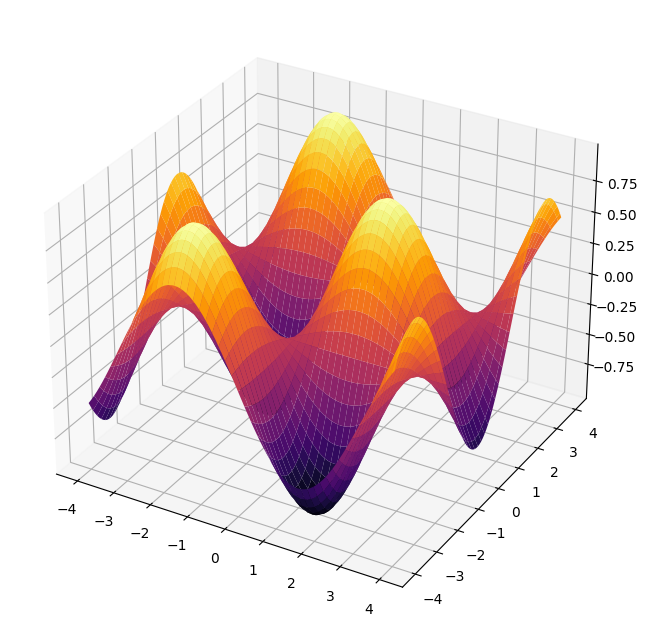

In [13]:
grid_x, grid_y = np.meshgrid(np.linspace(-4,4,100), np.linspace(-4,4,100))

draw_f(grid_x, grid_y)

### Пакет Matplotlib
---


In [2]:
import scipy.stats as sps
import numpy as np

import matplotlib.pyplot as plt

## Задача 4

В этом задании вам показан график, который нужно получить (иллюстрирующий ЦПТ / бутстреп) и посчитаны все необходимые массивы. Вам нужно написать код, который отрисовывает максимально похожий график (revrese engineering решаем).

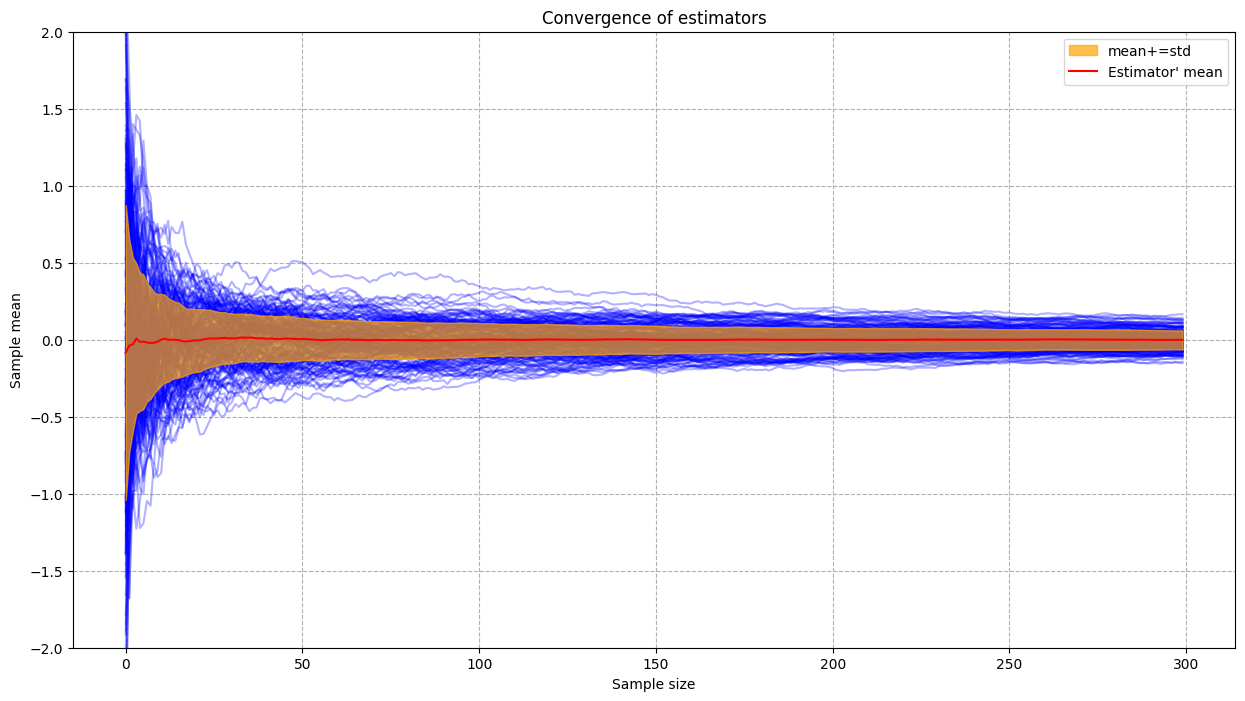

In [119]:
cnt_samples = 200
n = 300
theta = 0

samples = sps.norm.rvs(size=(cnt_samples, n))
thetas = np.cumsum(samples, axis=1) / np.arange(1, n + 1)

mean_theta = np.mean(thetas, axis=0)
stds = np.std(thetas, axis=0)

#plt.plot(mean_theta)
fig, ax = plt.subplots()

fig.set_dpi(100)
fig.set_size_inches(15, 8)

x = range(n)

for t in thetas:
    ax.plot(t, color="blue", alpha=0.3)


ax.fill_between(x, mean_theta + stds, mean_theta - stds, color='orange', alpha=0.7, label='mean+=std', zorder=2)



ax.plot(mean_theta, label='Estimator\' mean', color="red")

#decorative
ax.set_ylim([-2,2])
ax.set_title('Convergence of estimators')
ax.set_xlabel('Sample size')
ax.set_ylabel('Sample mean')
ax.grid(linestyle='--')
ax.legend()
#plt.plot(thetas)

In [16]:
raise ValueError("In case you deside do run all the cells before watching the example below")

ValueError: In case you deside do run all the cells before watching the example below

In [ ]:
# EXAMPLE, do not run this cell

### Пакет pytorch
---


In [1]:
import torch

*Дисклеймер 1:* в последующих задачах необходимо будет рисовать графики. Графики должны быть понятными. Критерий понятности: на график можно посмотреть в отрыве от кода и полностью понять что на нем изображено. Используйте подписи к осям, легенду и т.д.

*Дисклеймер 2:* весь код на торче должен запускаться без изменений как на CPU, так и на GPU (если оно доступно). 


## Задача 5


Есть такой алгоритм машинного обучения, который называется "Метод опорных векторов" (SVM). 

В его сути много интересной теории связанной с линейной алгеброй, но сейчас нам это не так интересно. В этом задании необходимо "реализовать" оптимизацию Loss-а для SVM с помощью torch (аналогично ячейкам раздела Optimization с семинарского ноутбука).

Для этого потребуются следующие формулы: 

Предсказания $y\_pred = <x, w>$ и функция потерь на одном объекте $loss(y, y\_pred) = \max(1 - y \cdot y\_pred, 0)$

In [227]:
def svm_loss(y_pred, y_true):
    # реализуйте функцию потерь SVM. Помните что на вход приходят тензоры ответов на всех объектах
    # а вернуть нужно одно число -- лосс для всей выборки
    res = torch.relu(y_true.dot(y_pred))
    return res

x = torch.randn(100, 10)  # выборка, здесь тоже необходимо что-то поменять чтобы удовлетворить дисклеймер 2
w = torch.randn(10, requires_grad=True) # вектор весов
y = torch.where(x.sum(dim=1) > 0, torch.ones(100), -torch.ones(100)) # случайный массив из +1 или -1 который будет в роли таргетов

In [85]:
x.size(), w.size(), (x @ w).size()

x

tensor([[ 9.0950e-01,  1.3301e+00, -4.6147e-01,  6.2258e-01,  2.7604e+00,
          9.5279e-01, -1.0895e+00, -1.6334e-01, -1.1862e+00, -4.0188e-01],
        [ 9.4854e-01,  6.8028e-01, -2.1823e-01, -9.1094e-01, -9.7293e-01,
         -5.6742e-01, -6.0486e-01, -8.9755e-01, -1.2216e+00,  6.1727e-01],
        [ 8.1611e-02, -5.0451e-01, -1.1948e+00,  1.0979e-01, -4.0804e-01,
         -6.7463e-01, -2.7276e-01, -3.8049e-01, -2.8122e-02, -6.8777e-01],
        [ 2.9836e-01,  6.2989e-01,  1.2948e+00,  9.3502e-01,  2.9277e-01,
         -1.8207e-01, -1.0993e+00,  3.5543e-01,  1.6351e+00,  4.0259e-01],
        [ 4.2785e-01, -1.3028e+00, -1.1083e+00,  5.2070e-01, -1.2483e+00,
          1.0570e+00, -4.8358e-01, -7.7057e-03,  1.5928e+00, -1.9621e+00],
        [ 3.4459e-01, -1.4318e+00, -2.4281e-01, -1.1202e+00,  4.2786e-01,
         -1.6720e-01, -1.3944e-02, -1.2891e+00, -1.1085e+00,  1.3944e-01],
        [ 1.0608e+00,  7.0144e-02, -2.8536e-01,  2.3276e+00, -5.6621e-01,
          4.2543e-01, -2.4799e-0

Сохраните как менялся лосс при использовании 2-3 различных оптимизаторов, постройте соответствующие графики (с помощью matplotlib), выберите лучший для конкретно этой задачи.

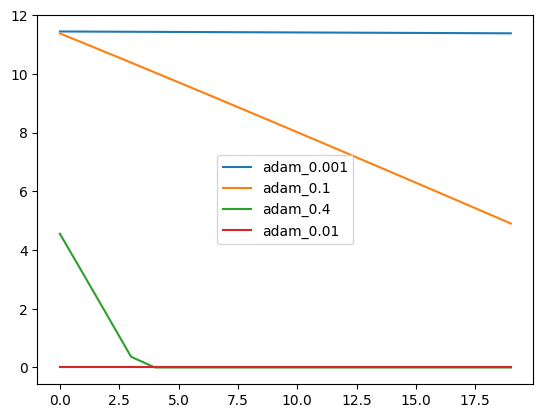

In [229]:

def run(optimiser):
    n_epochs = 20
    losses = []

    for epoch in range(n_epochs):
        ### zero grad
        optimiser.zero_grad()

        ### forward + backward
        y_pred = torch.sigmoid(x @ w)  # my_nn(x)
        loss = svm_loss(y_pred, y)
        loss.backward()  # optims can only minimize, in case we search for argmax use (-loss)

        ### optimizer step
        optimiser.step()

        losses.append(loss.item())

        ### logging
        # print(f'Epoch {epoch}, loss {loss.item():.4f}')

    return losses

def plot(x, label):
    plt.plot(x, label=label)
    plt.legend()

optim_adam = torch.optim.Adam([w], lr=0.01)
optim_adam2 = torch.optim.Adam([w], lr=0.04)
optim_adam3 = torch.optim.Adam([w], lr=0.001)
optim_adam4 = torch.optim.Adam([w], lr=0.0001)

# test = run(optim_adam)
plot(run(optim_adam4), 'adam_0.001')
plot(run(optim_adam), 'adam_0.1')
plot(run(optim_adam2), 'adam_0.4')
plot(run(optim_adam3), 'adam_0.01')


# plot(adam_01_loss, 'adam 0.1')
# plot(sgd_loss, 'sgd')

**Вопрос:** для чего нужен метод тензоров `.item()`?

**Ответ:** `.item()` нужен для того, чтобы получить значение тензора если он содержит один элемент.

### Задача 6

Нужно сделать все тоже самое, что и в задании 5, только теперь сравниваем не оптимизатор, а архитектуры нейросетей.
Для сравнения зафиксируем оптимизатор Адам с параметром $lr=0.001$

Реализуйте 2 нейронных сети следующими архитектурами:

1) Последовательная сеть: x -> линейный слой в размерность 16, leaky_relu -> линейный слой в размерность 32, leaky_relu -> линейный слой в размерность 1
2)  Нелинейная сеть
    1) x -> линейный слой в 16, leaky_relu = x1
    2) x -> линейный слой в 8, tanh = x2
    3) x -> линейный слой в 8, elu = x3

        конкатенация [x1, x2, x3] -> линейный слой в 8, leaky_relu -> линейный слой в 1

Изобразите на графиках как изменяется лосс для двух архитектур нейросетей. Используйте одинаковое коилчество эпох.

### Задача 7

In [230]:
# download data
!wget "https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1" -O ./quora.txt

--2022-11-02 20:05:26--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2022-11-02 20:05:26--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20fb7b16f5dfe890f1c1eaf224.dl.dropboxusercontent.com/cd/0/get/BwCLys_E8vyz9oZ-6EsovNjyvheKATEzXPbcV98awU-t93s7GoRVlHBVHZ2GdoOD_YqOluXCzB5z8FWyWoepEQMKNnxjWpOwvCqEmgIKE_il2C91T7ewwLzJL_9A8ookMZzwBmY-GIRKSRJ8v0xbZjP4Ryh58BCwpMtRNSYjRVMdLQ/file?dl=1# [following]
--2022-11-02 20:05:27--  https://uc20fb7b16f5dfe890f1c1eaf224.dl.dropboxusercontent.com/cd/0/get/BwCLys_E8vyz9oZ-6EsovNjyvheKATEzXPbcV98awU-t93s7GoRVlHBVHZ2GdoOD_YqOluXCzB5z8FWyWoep

В текстовом файле `quora.txt` содержатся вопросы с сайта quora. В этом задании мы будем решать искуственнную задачу классификации: label = 1 если длина вопроса (в символах) *строго больше* 30. 

Для этого нам потребуется сделать несколько шагов. Первое: написать собственный датасет.

Для этого нам нужно определиться с тем, как мы будем представлять текст в виде векторов. Я предлагаю самый простой способ - Bag of Words.

Для этого вам необходимо 
1) привести все слова в датасете в нижний регистр
2) составить словарь уникальных слов в датасете, встречающиеся хотя бы 3 раза -- получится словарь размера `|V|`.
3) вектор для вопроса -- это вектор размера `|V|`, где на `i`-том месте указано, сколько раз слово с номером `i` встречается в вопросе


В случае слишком большого размера словаря (и соответственно вектора для вопросов) можно дополнительно удалить стоп-слова (например `the`, `a`, `an`, `to be`, ...). Как это легко сделать рассказано по [ссылке](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/). 

In [ ]:
# если решите удалять стопслова, то необходимо выполнить эту ячейку

# import nltk
# nltk.download('stopwords')

In [ ]:
class BOWDataset:
    def __init__():
        # cоставляем словарь vocabulary
        pass
    
    def __len__(self) -> int:
        # количество примеров в датасете
        pass
    
    def __getitem__(self, idx: int) -> tuple[torch.Tensor, torch.Tensor]:
        # вернуть bag-of-words вектор и его label по индексу
        pass

Разбейте датасет на train и test часть. Это можно сделать с помощью функций из `torch.utils.data`. Создайте `Dataloader`-ы.

In [ ]:
# YOUR CODE HERE

Напишите любую архитектуру нейросети, которую решите использовать для такой задачи. Используйте только линейные слои и активации. Слишком глубокой делать сеть не нужно, достаточно 3-4 линейных слоев.

На выходе из нейросети должны быть вектора размерности `2` (сравните с примером про MNIST, там на выходе вектор размерности `10`)

In [ ]:
class MySuperCoolNN:
    # YOUR CODE HERE
    pass

Напишите цикл обучения/валидации, запустите, изобразите на графиках как меняется loss и accuracy (за значение метрик ,балл за задание не снимается).

In [ ]:
n_epochs = 10

# YOUR CODE HERE
for epoch in range(n_epochs):
    pass
    # YOUR CODE HERE

## FINITA!